In [1]:
# importing the necessary libraries

import nltk

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import re


In [2]:
# downloading the necessary corpora

nltk.download(['punkt', 'stopwords'])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
from nltk.corpus import stopwords

In [6]:
# taking a look at the words we've downloaded

tk = stopwords.words('english')
tk

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [8]:
# stopwords can be accessed across any language

tt = stopwords.words('french')
tt

['au',
 'aux',
 'avec',
 'ce',
 'ces',
 'dans',
 'de',
 'des',
 'du',
 'elle',
 'en',
 'et',
 'eux',
 'il',
 'ils',
 'je',
 'la',
 'le',
 'les',
 'leur',
 'lui',
 'ma',
 'mais',
 'me',
 'même',
 'mes',
 'moi',
 'mon',
 'ne',
 'nos',
 'notre',
 'nous',
 'on',
 'ou',
 'par',
 'pas',
 'pour',
 'qu',
 'que',
 'qui',
 'sa',
 'se',
 'ses',
 'son',
 'sur',
 'ta',
 'te',
 'tes',
 'toi',
 'ton',
 'tu',
 'un',
 'une',
 'vos',
 'votre',
 'vous',
 'c',
 'd',
 'j',
 'l',
 'à',
 'm',
 'n',
 's',
 't',
 'y',
 'été',
 'étée',
 'étées',
 'étés',
 'étant',
 'étante',
 'étants',
 'étantes',
 'suis',
 'es',
 'est',
 'sommes',
 'êtes',
 'sont',
 'serai',
 'seras',
 'sera',
 'serons',
 'serez',
 'seront',
 'serais',
 'serait',
 'serions',
 'seriez',
 'seraient',
 'étais',
 'était',
 'étions',
 'étiez',
 'étaient',
 'fus',
 'fut',
 'fûmes',
 'fûtes',
 'furent',
 'sois',
 'soit',
 'soyons',
 'soyez',
 'soient',
 'fusse',
 'fusses',
 'fût',
 'fussions',
 'fussiez',
 'fussent',
 'ayant',
 'ayante',
 'ayantes',


In [9]:
# getting the data we're working with

pk = pd.read_csv('https://raw.githubusercontent.com/Explore-AI/Public-Data/master/Data/classification_sprint/mbti_train.csv')
pk.head(5)

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


In [10]:
ty = pk.type.unique()
ty

# looking at the list of personalities that we have

array(['INFJ', 'ENTP', 'INTP', 'INTJ', 'ENTJ', 'ENFJ', 'INFP', 'ENFP',
       'ISFP', 'ISTP', 'ISFJ', 'ISTJ', 'ESTP', 'ESFP', 'ESTJ', 'ESFJ'],
      dtype=object)

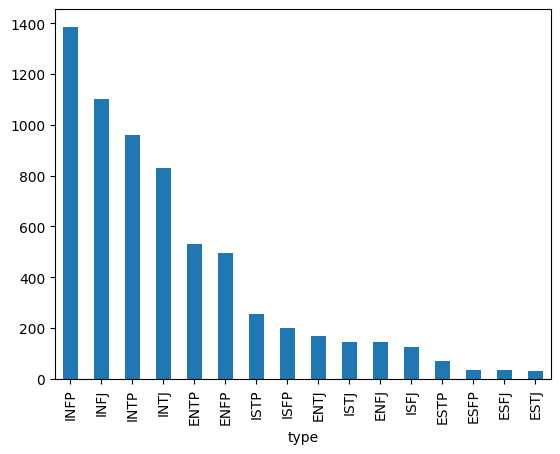

In [11]:
# visualizing the distribution of the mbti personality types

pk['type'].value_counts().plot(kind = 'bar')
plt.show()

In [12]:
# looking at the frequency numbers

tx = pk['type'].value_counts()
tx

type
INFP    1386
INFJ    1100
INTP     960
INTJ     830
ENTP     530
ENFP     496
ISTP     255
ISFP     198
ENTJ     167
ISTJ     145
ENFJ     143
ISFJ     124
ESTP      71
ESFP      36
ESFJ      35
ESTJ      30
Name: count, dtype: int64

In [13]:
# to separate the posts to its own row

all = []

for i, row in pk.iterrows():
  for post in row['posts'].split('|||'):
    all.append([row['type'], post])


In [14]:
all = pd.DataFrame(all, columns = ['type', 'post'])
all

# we can se that the number of rows has increased

,type,post
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw
1,INFJ,http://41.media.tumblr.com/tumblr_lfouy03PMA1q...
2,INFJ,enfp and intj moments https://www.youtube.com...
3,INFJ,What has been the most life-changing experienc...
4,INFJ,http://www.youtube.com/watch?v=vXZeYwwRDw8 h...
...,...,...
316543,INFP,"Kallinhausin, you may have just rooted out the..."
316544,INFP,"In regards to the king, (in the show, not in t..."
316545,INFP,Sunlight bouncing off the fog at dawn. Serend...
316546,INFP,Songs are really powerful.


In [15]:
# looking at the frequency of the mbti types

all['type'].value_counts()

type
INFP    67846
INFJ    53807
INTP    46637
INTJ    39776
ENTP    26017
ENFP    23925
ISTP    12566
ISFP     9521
ENTJ     8174
ISTJ     7018
ENFJ     6947
ISFJ     6051
ESTP     3437
ESFJ     1668
ESFP     1663
ESTJ     1495
Name: count, dtype: int64

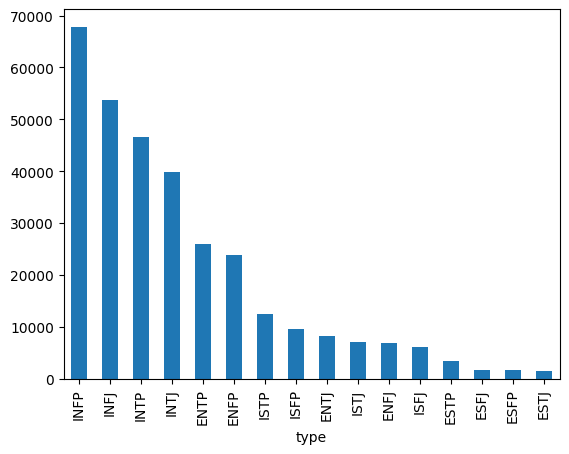

In [16]:
# visualizing the distribution

all['type'].value_counts().plot(kind = 'bar')
plt.show()

# we can see there is an increase in the frequency of the distribution

In [17]:
# Replace URLs in the 'post' column with a placeholder string

pp = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
xx = r'url-web'
all['post'] = all['post'].replace(to_replace = pp, value = xx, regex = True)

In [18]:
all.head()

,type,post
0,INFJ,'url-web
1,INFJ,url-web
2,INFJ,enfp and intj moments url-web sportscenter n...
3,INFJ,What has been the most life-changing experienc...
4,INFJ,url-web url-web On repeat for most of today.


In [19]:
# to make all the text in the post column lowercase

all['post'] = all['post'].str.lower()

In [20]:
# to remove the punctuations in the data
# we get to see the punctuation marks that shall be removed from the dataset

import string
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [21]:
def rp(post):
  return ''.join([l for l in post if l not in string.punctuation])

all['post'] = all['post'].apply(rp)

In [22]:
all['post'].iloc[3]

# checking on one of the rows to see if the punctuation marks have been removed

'what has been the most lifechanging experience in your life'

In [23]:
# tokenizing the data for analysis

from nltk.tokenize import word_tokenize, TreebankWordTokenizer

In [24]:
# using the TreebankWordTokenizer

tko = TreebankWordTokenizer()
all['tokens'] = all['post'].apply(tko.tokenize)

In [25]:
all['tokens'].iloc[2]

['enfp',
 'and',
 'intj',
 'moments',
 'urlweb',
 'sportscenter',
 'not',
 'top',
 'ten',
 'plays',
 'urlweb',
 'pranks']

In [26]:
# for more analysis to be carried out, we can choose to tokenize h edata that we have

from nltk import PorterStemmer, LancasterStemmer, SnowballStemmer

words = 'caring cares cared caringly carefully'
st = SnowballStemmer('english')

def ms(words, st):
  return[st.stem(word) for word in words]



In [27]:
# to apply it to the desired column

all['stem'] = all['tokens'].apply(ms, args = (st, ))

In [28]:
all['stem'].iloc[268702]

['i',
 'hate',
 'april',
 'fool',
 'day',
 'angri',
 'there',
 'a',
 'site',
 'im',
 'regular',
 'on',
 'and',
 'the',
 'admin',
 'are',
 'screw',
 'everyth',
 'up',
 'today',
 'for',
 'a',
 'laugh',
 'but',
 'i',
 'dont',
 'find',
 'it',
 'funni',
 'im',
 'actual',
 'quit',
 'freak',
 'out',
 'about',
 'it']

In [29]:
# to see the difference brought about by the stem function

for i, t in enumerate(all.iloc[268702]['tokens']):
  print('{:20s}-->{:10s}'.format(t, all.iloc[268702]['stem'][i]))

i                   -->i         
hate                -->hate      
april               -->april     
fools               -->fool      
day                 -->day       
angry               -->angri     
theres              -->there     
a                   -->a         
site                -->site      
im                  -->im        
regularly           -->regular   
on                  -->on        
and                 -->and       
the                 -->the       
admins              -->admin     
are                 -->are       
screwing            -->screw     
everything          -->everyth   
up                  -->up        
today               -->today     
for                 -->for       
a                   -->a         
laugh               -->laugh     
but                 -->but       
i                   -->i         
dont                -->dont      
find                -->find      
it                  -->it        
funny               -->funni     
im            

In [31]:
# we can also choose to lemmatize the data

from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

lem = WordNetLemmatizer()



[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [32]:
# applying the lemmatization function to the tokens column

def mbz (words, lem):
  return [lem.lemmatize(word) for word in words]

all['lemma'] = all['tokens'].apply(mbz, args = (lem, ))

In [38]:
# checking if the lemmatization has indeed been carried out

for i, t in enumerate(all.iloc[268702]['tokens']):
  print('{:20s} --> {:10s}'.format(t, all.iloc[268702]['lemma'][i]))

i                    --> i         
hate                 --> hate      
april                --> april     
fools                --> fool      
day                  --> day       
angry                --> angry     
theres               --> there     
a                    --> a         
site                 --> site      
im                   --> im        
regularly            --> regularly 
on                   --> on        
and                  --> and       
the                  --> the       
admins               --> admins    
are                  --> are       
screwing             --> screwing  
everything           --> everything
up                   --> up        
today                --> today     
for                  --> for       
a                    --> a         
laugh                --> laugh     
but                  --> but       
i                    --> i         
dont                 --> dont      
find                 --> find      
it                   --> it 

In [39]:
# to remove the stopwords from our data

def rem(tokens):
  return[t for t in tokens if t not in stopwords.words('english')]



In [40]:
# to apply it to our tokens column

all['stem'] = all['tokens'].apply(rem)
all['stem']

# we get to see the rows where the stopwords were removed

0                                                  [urlweb]
1                                                  [urlweb]
2         [enfp, intj, moments, urlweb, sportscenter, to...
3                          [lifechanging, experience, life]
4                           [urlweb, urlweb, repeat, today]
                                ...                        
316543    [kallinhausin, may, rooted, problem, infps, pr...
316544    [regards, king, show, book, havent, read, book...
316545         [sunlight, bouncing, fog, dawn, serendipity]
316546                            [songs, really, powerful]
316547                     [remember, werent, trying, hurt]
Name: stem, Length: 316548, dtype: object